In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
class LinearRegression:
    def __init__(self, n_feature = 1, lr=1e-5, epoch=5000, batch_size=10, tol = 1e-5, gd = None):
        self.lr = lr  # 学习率
        self.epoch = epoch    # 迭代次数
        self.batch_size = batch_size        # 批量大小
        self.tol = tol          # 收敛阈值
        self.W = np.random.randn(n_feature + 1) * 0.05    # 权重
        self.losses = []
        self.gd = gd
        self.norm_params = None  # 用于保存归一化参数

    def fit(self, X, y):
        # # 无归一化
        # X_norm = np.c_[X, np.ones(X.shape[0])]  # 添加一列全为1的列作为偏置   

        # 对x进行归一化
        self.norm_params = (X.min(axis=0), X.max(axis=0))  # 保存最小值和最大值
        X_norm = self.min_max_normalization(X)  # 对X进行归一化
        # X_norm = self.mean_normalization(X)
        X_norm = np.c_[X_norm, np.ones(X_norm.shape[0])]  # 添加一列全为1的列作为偏置
               
        for i in range(self.epoch):
            if self.gd == 'sgd':
                self._sgd_update(X_norm, y)
            elif self.gd == 'bgd':
                self._bgd_update(X_norm, y)
            elif self.gd == 'mbgd':
                self._mbgd_update(X_norm, y)
            if i % 100 == 0:
                loss = self._mse_loss(y, np.dot(X_norm,self.W))
                self.losses.append(loss)
                print(f"for {i} iteration, the loss is {loss}")
        return self.W

    def _predict(self, X):
        return X @ self.W 

    def _mse_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)  # 计算均方误差损失
        
    def _gradient(self, X, y, y_pred):
        # if isinstance(y, np.ndarray):
        #     delta_y = (y_pred-y).reshape((y.shape[0], 1))
        #     return np.mean(2 * delta_y.T @ X)
        # else:
        #     delta_y = y_pred-y
        #     return (2 * delta_y.T * X).reshape((self.W.shape[0]))
        
        grad = 1 / X.shape[0] * np.dot(X.T, (y_pred - y))
        grad = grad.reshape(self.W.shape)
        return grad

    def _sgd_update(self, X, y): #epoch=2750
        pred = X @ self.W 
        i = np.random.randint(0, len(X))
        grad = self._gradient(X[i,:][np.newaxis, :], y[i], pred[i])
        self.W -= self.lr * grad  # 随机梯度下降更新

    def _bgd_update(self, X, y): #lr=1e-6
        pred = X @ self.W 
        grad = self._gradient(X, y, pred)
        self.W -= self.lr * grad  # 批量梯度下降更新
        
    def _mbgd_update(self, X, y): #epoch=10000
        pred = self._predict(X)
        indices = np.random.choice(y.shape[0], self.batch_size, replace=False)
        # grad = np.zeros(self.W.shape[0])
        # for i in indices:
        #     grad += self._gradient(X[i], y[i], pred[i])
        grad = self._gradient(X[indices], y[indices], pred[indices])
        self.W -= self.lr * grad/self.batch_size

    def predict(self, X):
        # 使用保存的归一化参数对新的输入数据X进行归一化
        X_norm = self.min_max_normalization(X, self.X_norm_params)
        return self._predict(X_norm)

    # def min_max_normalization(self, X):
    #     return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # 最小-最大归一化
    
    def min_max_normalization(self, X, params=None):
        if params is None:
            params = (X.min(axis=0), X.max(axis=0))
        X_min, X_max = params
        return (X - X_min) / (X_max - X_min)

    def mean_normalization(self, X, params=None):
        if params is None:
            X_mean, X_std = X.mean(axis=0), np.std(X, axis=0)
        else:
            X_mean, X_std = params
        return (X - X_mean) / X_std


In [20]:
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b + np.random.normal(0, 5, size=X_train.shape)
y_train = y_train.reshape(-1)

for 0 iteration, the loss is 4298.915702784362
for 100 iteration, the loss is 716.6887272908492
for 200 iteration, the loss is 387.00443916213897
for 300 iteration, the loss is 323.10442927603015
for 400 iteration, the loss is 286.3487058994745
for 500 iteration, the loss is 252.61993036076026
for 600 iteration, the loss is 223.29954907802167
for 700 iteration, the loss is 198.1407707972217
for 800 iteration, the loss is 175.47568764310626
for 900 iteration, the loss is 156.0440031299294
for 1000 iteration, the loss is 139.11441706414138
for 1100 iteration, the loss is 124.41552516481016
for 1200 iteration, the loss is 110.40784656688871
for 1300 iteration, the loss is 99.26668202803063
for 1400 iteration, the loss is 89.77635425901357
for 1500 iteration, the loss is 80.64162510434824
for 1600 iteration, the loss is 73.03879690730197
for 1700 iteration, the loss is 65.84078428581748
for 1800 iteration, the loss is 60.336000828739344
for 1900 iteration, the loss is 55.10622751084966
for

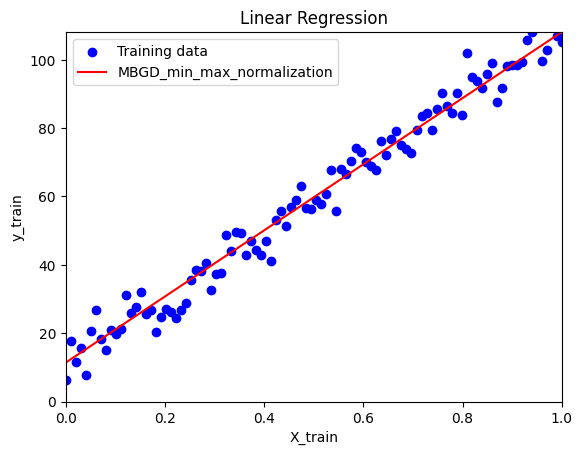

In [21]:
# model = LinearRegression(n_feature=X_train.shape[1],lr = 1e-5,epoch = 2750,gd = 'sgd') # SGD with none_normalization
# model = LinearRegression(n_feature=X_train.shape[1],lr = 1e-6,epoch = 5000,gd = 'bgd') # BGD with none_normalization
# model = LinearRegression(n_feature=X_train.shape[1],lr = 1e-4,epoch = 5000,gd = 'mbgd') # MBGD with none_normalization
model = LinearRegression(n_feature=X_train.shape[1],lr = 1e-1,epoch = 5000,gd = 'mbgd') # MBGD with normalization
X_train = model.min_max_normalization(X_train) # MBGD with min_max_normalization
# X_train = model.mean_normalization(X_train)    # MBGD with mean_normalization
w = model.fit(X_train, y_train)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')
print(X_train.shape, model.W.shape)

x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=100)
y_values = w[0] * x_values + w[1] 
plt.plot(x_values, y_values, color='red', label='MBGD_min_max_normalization')
# plt.xlim([0, 100])
# plt.ylim([0, 100])
plt.xlim([0, x_values[len(x_values)-1]])
plt.ylim([0, y_values[len(y_values)-1]])
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Linear Regression')
# plt.savefig('MBGD_min_max.png', bbox_inches='tight')
plt.show()

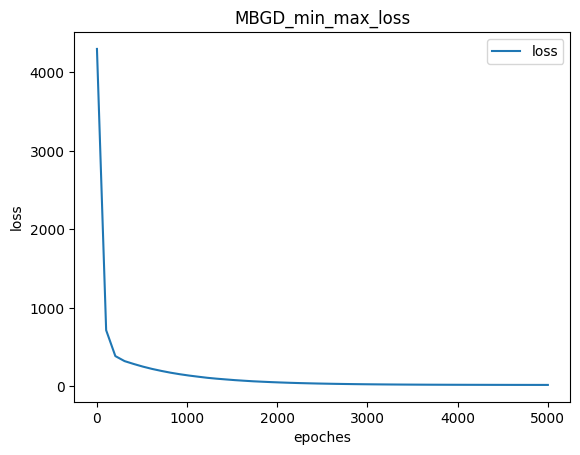

In [22]:
los = model.losses
epoches = np.linspace(0, model.epoch, num=len(los))
plt.plot(epoches, los, label='loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend()
plt.title('MBGD_min_max_loss')
# plt.savefig('MBGD_min_max_loss.png')
plt.show()